In [15]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.cluster import  DBSCAN
import  scipy.cluster.hierarchy as sch
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, normalize
raw_data=pd.read_csv("HW3_1_data.csv")
raw_data=pd.DataFrame(raw_data)
#预处理去除含有空值的行
raw_data.dropna(axis=0,inplace=True)

In [16]:
#使用谱聚类，先看n_clusters为多少时，silhouette_score最高
raw_data=pd.DataFrame(StandardScaler().fit_transform(raw_data))
score=0
n_cluser_pre=0
for i in range(2,10):
    spectral_model_rbf = SpectralClustering(n_clusters = i, affinity ='rbf')
    labels_rbf=spectral_model_rbf.fit_predict(raw_data)
    a=metrics.silhouette_score(raw_data, labels_rbf)
    if a>score:
        n_cluser_pre=i
        score=a
print(score)

0.5378792410010329


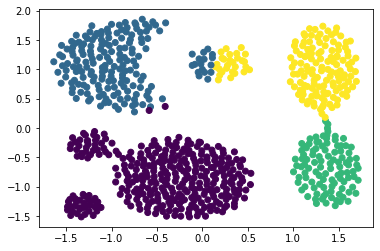

In [17]:
spectral_model_rbf = SpectralClustering(n_clusters = n_cluser_pre, affinity ='rbf')
labels_rbf=spectral_model_rbf.fit_predict(raw_data)
plt.scatter(raw_data.values[:,0],raw_data.values[:,1],c=labels_rbf)
plt.show()

In [18]:
#使用KMeans算法，先看n_clusters为多少时，silhouette_score最高，效果最好
cluster_temp=0
score=0
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,random_state=9)
    y_pred = kmeans.fit_predict(raw_data)
    a=metrics.silhouette_score(raw_data, y_pred)
    if a >score:
        score=a
        cluster_temp=i
print(score)

0.5365827183828406


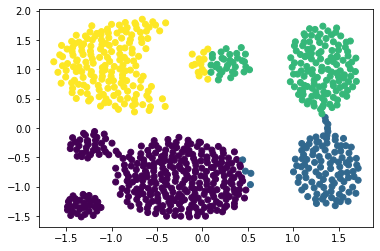

In [19]:
#KMeans 绘图
kmeans=KMeans(n_clusters=cluster_temp,random_state=9)
y_pred = kmeans.fit_predict(raw_data)
plt.scatter(raw_data.values[:,0], raw_data.values[:,1], c=y_pred)
plt.show()

In [20]:
import pandas as pd

homework2=pd.read_csv("HW3_2_data.csv")
homework2=pd.DataFrame(homework2)
print(len(homework2))

homework2.dropna(axis=0,inplace=True)
#去除BALANCE_FREQUENCY的异常值
homework2.drop(index=homework2[(homework2.loc[:,'BALANCE_FREQUENCY']>1)|(homework2.loc[:,'BALANCE_FREQUENCY']<0)].index,inplace=True)
print(len(homework2))
#去除CUST_ID再去聚类，CUST_ID对聚类没有作用
homework2.drop('CUST_ID',axis=1,inplace=True)



8950
8636


In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics
print(homework2.shape[1])
max_score=0.0
max_i=0
max_j=0
kmeans = KMeans(n_clusters=4, random_state=9)
#选取silhouette_score最高的两列。变化有两列的选取和n_clusters的值的大小
for i in  range(0,16):
    for j in range(i+1,17):
        #for clusters in range(2,10):
            what=pd.DataFrame(homework2.iloc[:,[i,j]])
            y_pred = kmeans.fit_predict(what)
            now_score=metrics.silhouette_score(what,y_pred)
            if now_score>max_score:
                max_i=i
                max_j=j
                max_score=now_score


print(max_i)
print(max_j)
print(max_score)


17
3
14
0.8532735579411923


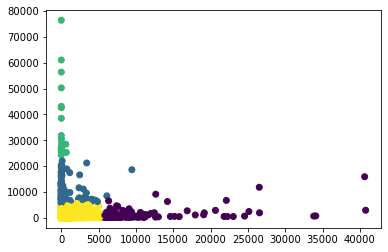

In [24]:
import matplotlib.pyplot as plt
sample=pd.DataFrame(homework2.iloc[:,[max_i,max_j]])
y_ppp= kmeans.fit_predict(sample)
plt.scatter(sample.values[:, 0], sample.values[:, 1], c=y_ppp)
plt.show()